In [44]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Read the CSV file

data = pd.read_csv(r'C:\Users\MONI\Desktop\VCODEZ Project\Airline Dataset.csv')

In [46]:
# look at the Data

data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


EXPLORATORY DATA ANALYSIS

In [47]:
# Finding if there is any Missing Data

data.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [48]:
data.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [50]:
print(data.dtypes)

Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object


In [51]:
# Convert Departure Date to Datetime Datatype
data['Departure Date'] = pd.to_datetime(data['Departure Date'], format='%m/%d/%Y', errors='coerce')

# Extract Departure Month and Day
data['Departure Month'] = data['Departure Date'].dt.month
data['Departure Day'] = data['Departure Date'].dt.day_name()

# Create a 'Full Name' Column
data['Full Name'] = data['First Name']+' '+data['Last Name']


In [52]:
# look at the Data

data.tail()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Departure Month,Departure Day,Full Name
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Pammie Kingscote,Cancelled,12,Sunday,Gareth Mugford
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Dorice Lochran,Cancelled,10,Sunday,Kasey Benedict
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Gearalt Main,On Time,9,Saturday,Darrin Lucken
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Judon Chasle,Cancelled,10,Wednesday,Gayle Lievesley
98618,8JYEcz,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,2022-04-16,JOK,Auguste Tindley,Delayed,4,Saturday,Wilhelmine Touret


VISUALIZING DATA

PIE CHART

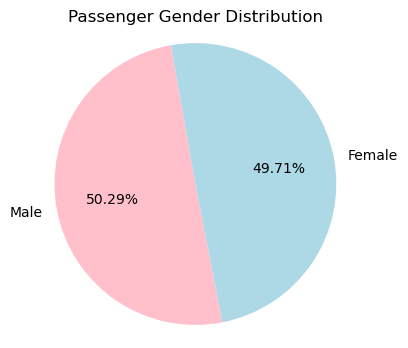

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

#Counts the Gender
gender_counts = data['Gender'].value_counts()

# Plot the data
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', colors=['pink', 'lightblue'], startangle=100)
plt.title('Passenger Gender Distribution')
plt.axis('equal')
plt.show()


HORIZONTAL BAR CHART

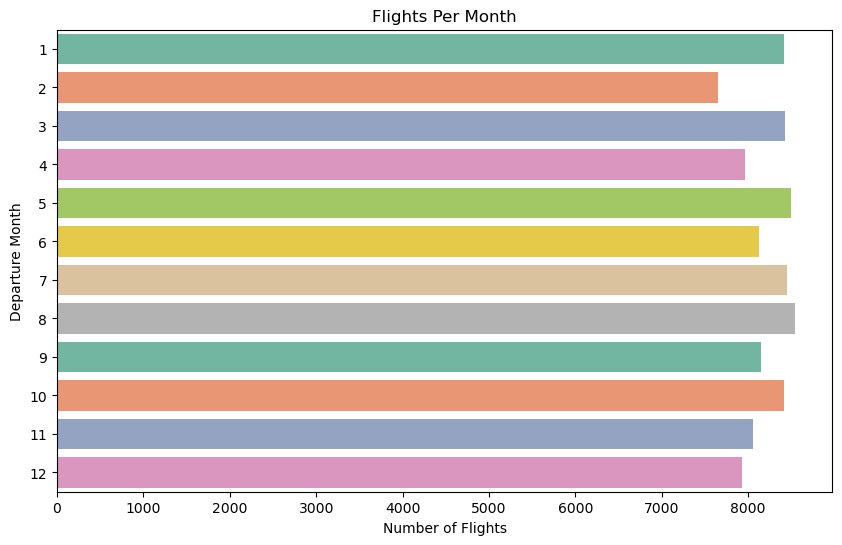

In [54]:
plt.figure(figsize =(10,6))
sns.countplot(y='Departure Month', data=data, palette='Set2')
plt.title('Flights Per Month')
plt.xlabel('Number of Flights')
plt.ylabel('Departure Month')
plt.show()


LINE CHART

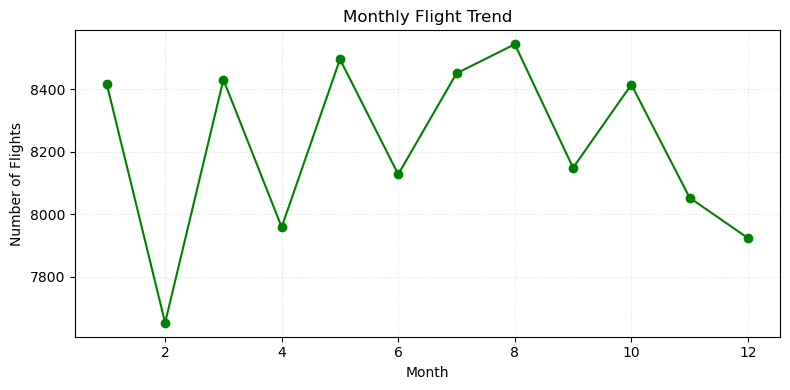

In [55]:
monthly_flights = data['Departure Month'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(monthly_flights.index, monthly_flights.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Flight Trend')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

BAR CHART

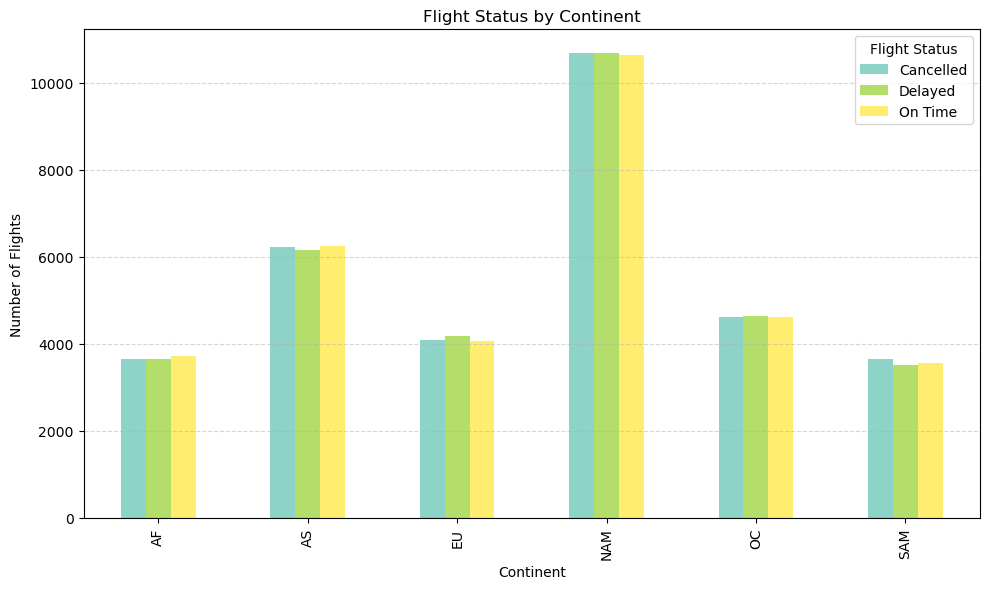

In [56]:
continent_status = data.groupby(['Airport Continent', 'Flight Status']).size().unstack()

continent_status.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title('Flight Status by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [59]:
data.to_csv(r'C:\Users\MONI\Desktop\VCODEZ Project\ Airline Data.csv', index=False)